![Demosaicking](https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/0129bbd70539e5c601b76b03e4d3883f67c39e72/Sesiones/Sesion2/Images/poster_sesion2.png)

# 🎨 **Hands-on Sesión 2.3: Transformaciones de Imágenes Digitales** 🖼️

En esta sesión aprenderemos a realizar **transformaciones clave** en imágenes digitales 📷. Exploraremos:

✅ Histogramas y ajustes de intensidad 📊  
✅ Transformaciones geométricas (traslación, rotación, escalado) 🔄  
✅ Ecualización de histograma y mejoras de contraste 🎭  
✅ Métodos avanzados como CLAHE y Stretching ⚡  
✅ Preguntas y desafíos para reforzar lo aprendido 🤔  

## 📂 **1. Creando Histogramas** <a name="tema1"></a> 📊

In [111]:
import numpy as np
import scipy.signal
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image

### 📥 **Carga de Imagen de Prueba**

Vamos a descargar una imagen clásica: **Lena** 📷

In [112]:
%%capture
image_url = "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/Lena512x512.png"
file_path = "Lena512x512.png"
!wget -O {file_path} {image_url}

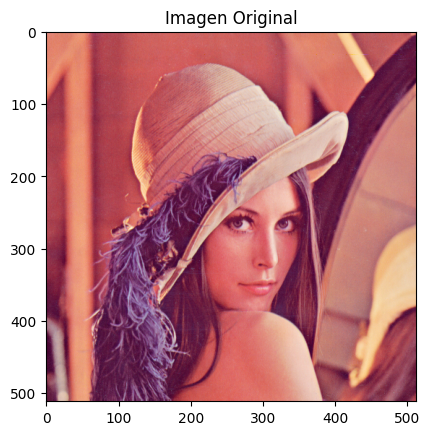

In [113]:
image = cv.imread("Lena512x512.png", cv.IMREAD_COLOR_RGB)

# Mostrar la imagen
plt.imshow(image)
plt.title("Imagen Original")
plt.show()


### 📊 **Generando el Histograma General**

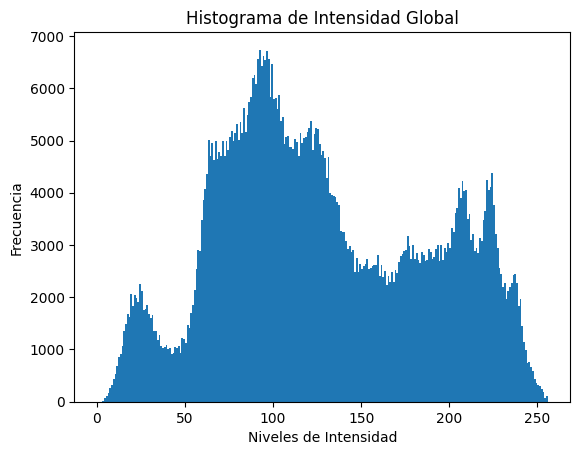

In [114]:
plt.hist(image.ravel(), bins=256, range=[0,256])
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Intensidad Global")
plt.show()

### 🏆 **Desafío:** Genera los histogramas para cada canal RGB y compáralos

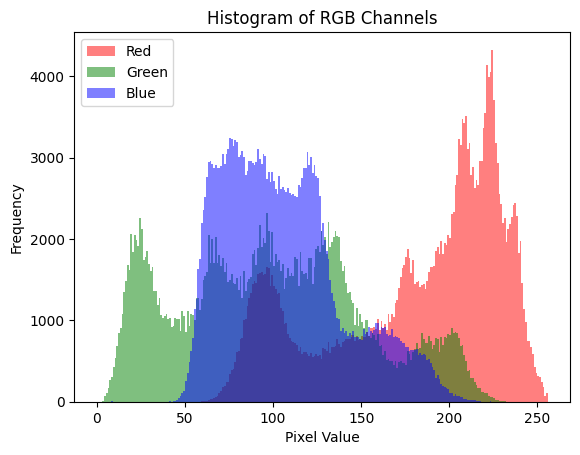

In [115]:
# Desafío 1: Generar histogramas RGB
red = np.array(image[:,:,0]).flatten()
green = np.array(image[:,:,1]).flatten()
blue = np.array(image[:,:,2]).flatten()
plt.hist(red, bins=256, range=[0, 256], alpha=0.5, label='Red', color='red')
plt.hist(green, bins=256, range=[0, 256], alpha=0.5, label='Green', color='green')
plt.hist(blue, bins=256, range=[0, 256], alpha=0.5, label='Blue', color='blue')

plt.title('Histogram of RGB Channels')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## 🔄 **2. Transformaciones Geométricas Afines** <a name="tema2"></a>

📌 En esta sección exploraremos **traslación**, **rotación** y **escalado**.

### ✈️ **Traslación (Translation)**

## Explicación del código
Matriz:
$$ T = \begin{bmatrix} 1 & 0 & tx \\ 0 & 1 & ty \end{bmatrix} $$
Donde:  
- $( tx = 100 )$ → Traslación **100 píxeles a la derecha**.
- $( ty = 50 )$ → Traslación **50 píxeles hacia abajo**.

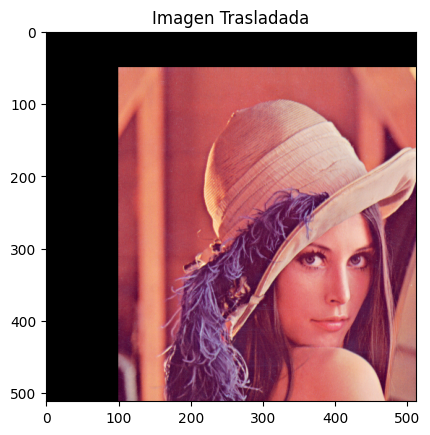

In [116]:
h, w = image.shape[:2]
transition_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
img_translation = cv.warpAffine(image, transition_matrix, (w, h))
#La anterior linea hace una transformación del primer parametro, con la
#matriz entregada
plt.imshow(img_translation)
plt.title("Imagen Trasladada")
plt.show()

### 🔄 **Rotación y Escalado**

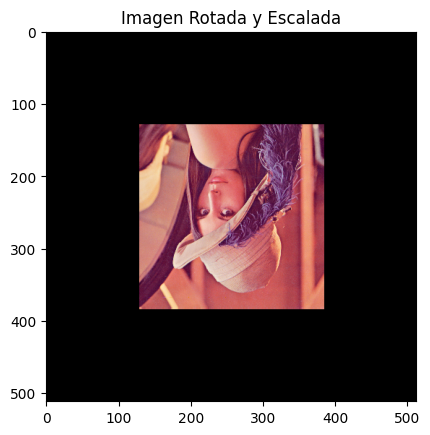

In [117]:
rotation_matrix = cv.getRotationMatrix2D(center=(w/2, h/2), angle=-180, scale=0.5)
rotated_image = cv.warpAffine(src=image, M=rotation_matrix, dsize=(w, h))
#Igual que el bloque anterior, dsize corresponde al tamaño de salida
plt.imshow(rotated_image)
plt.title("Imagen Rotada y Escalada")
plt.show()

(<matplotlib.image.AxesImage at 0x7994e7847e50>,
 Text(0.5, 1.0, 'Escalado arbitrario'))

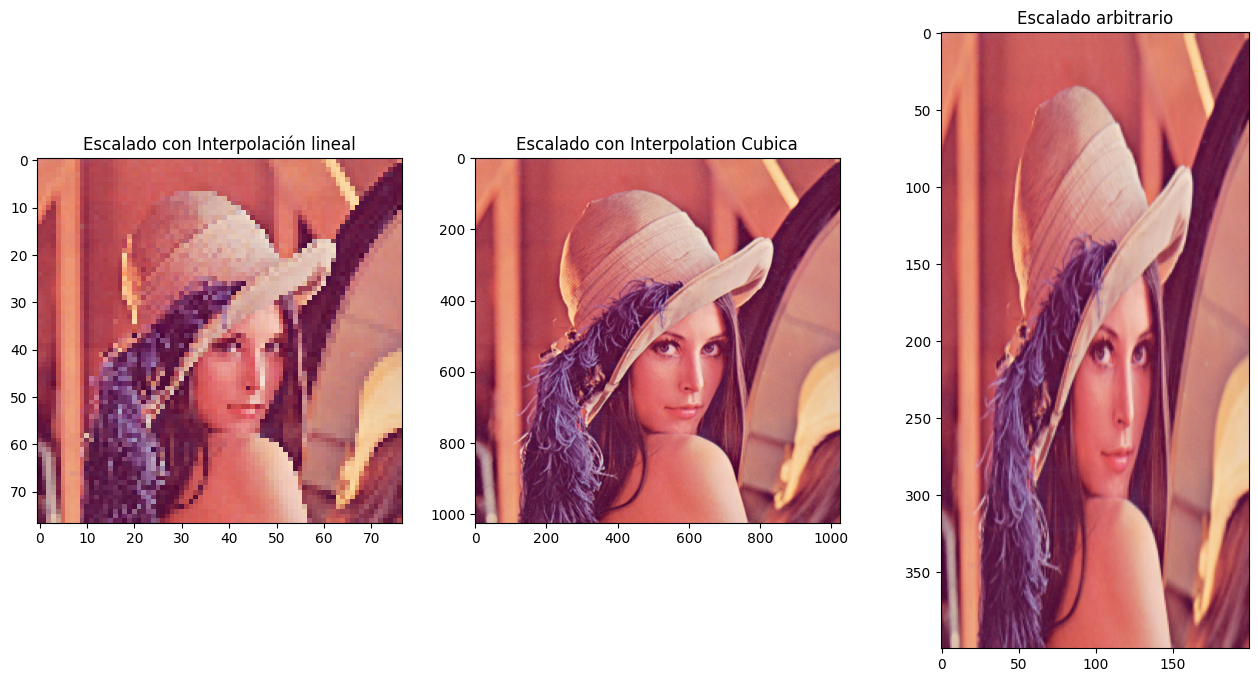

In [118]:
# Escalando
image_scaled = cv.resize(image, None, fx=0.15, fy=0.15) # 0.15 veces su tamaño original
image_scaled_2 = cv.resize(image, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC) # 2 veces su tamaño original

image_scaled_3 = cv.resize(image, (200, 400), interpolation=cv.INTER_AREA) # definiendo el tamaño arbitrariamente

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].imshow(image_scaled), ax[0].set_title("Escalado con Interpolación lineal")
ax[1].imshow(image_scaled_2), ax[1].set_title("Escalado con Interpolation Cubica")
ax[2].imshow(image_scaled_3), ax[2].set_title("Escalado arbitrario")

## 🌈 **3. Transformaciones de Intensidad a Nivel de Píxel** <a name="tema3"></a>

### 🔄 **Negativo de la Imagen**

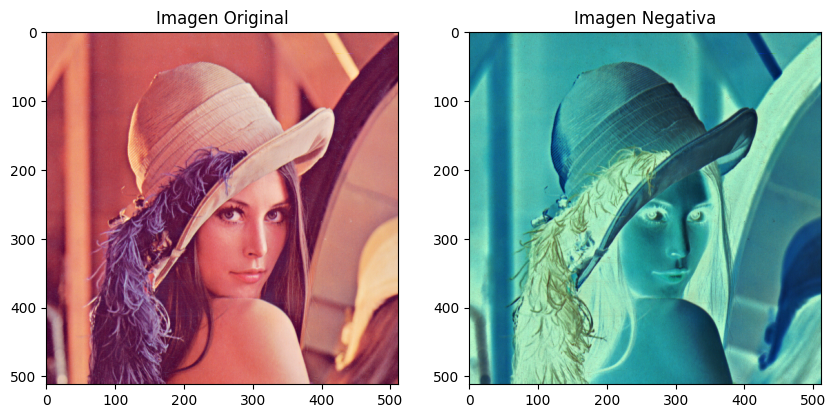

In [119]:
image_neg = 255 - image

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(image_neg)
plt.title("Imagen Negativa")
plt.show()

### ☀️ **Umbralización (Thresholding)**

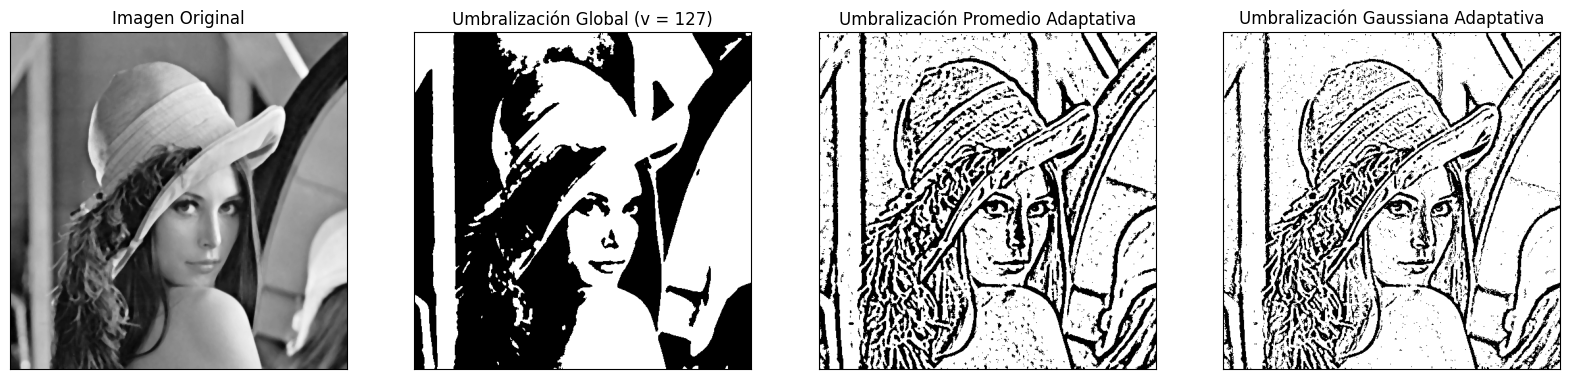

In [120]:
# Convertir la imagen a escala de grises
gray_img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

# Aplicar umbralización con OpenCV
img = gray_img
img = cv.medianBlur(img, 5)

ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)

titles = ['Imagen Original', 'Umbralización Global (v = 127)', 'Umbralización Promedio Adaptativa', 'Umbralización Gaussiana Adaptativa']
images = [img, th1, th2, th3]

plt.figure(figsize=(20, 10))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Para esconder los "ticks"
plt.show()

## 🎭 **4. Ecualización del Histograma** <a name="tema4"></a>

**Objetivo:** Mejorar el contraste ajustando la distribución de intensidad de la imagen.

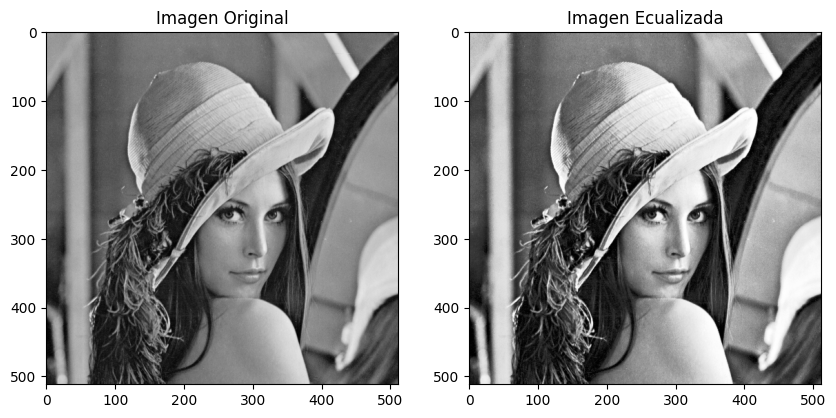

In [121]:
equ = cv.equalizeHist(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title("Imagen Ecualizada")
plt.show()

## ⚡ **5. CLAHE - Ecualización de Histograma Adaptativa** <a name="tema5"></a>

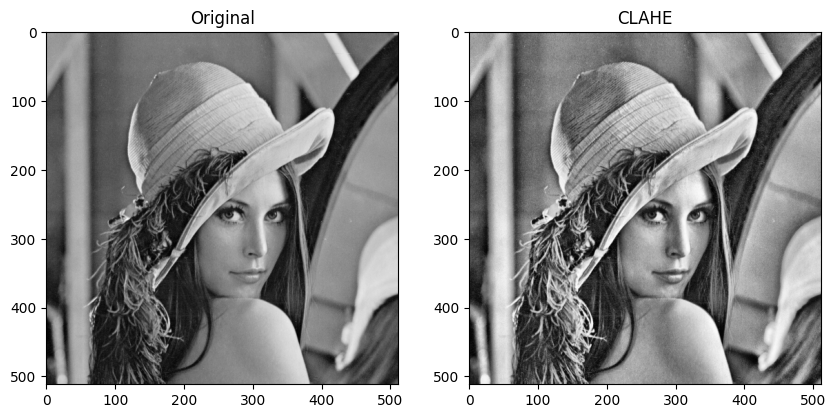

In [122]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("CLAHE")
plt.show()

## 🔍 **6. Ampliación del Histograma (Contrast Stretching)** <a name="tema6"></a>

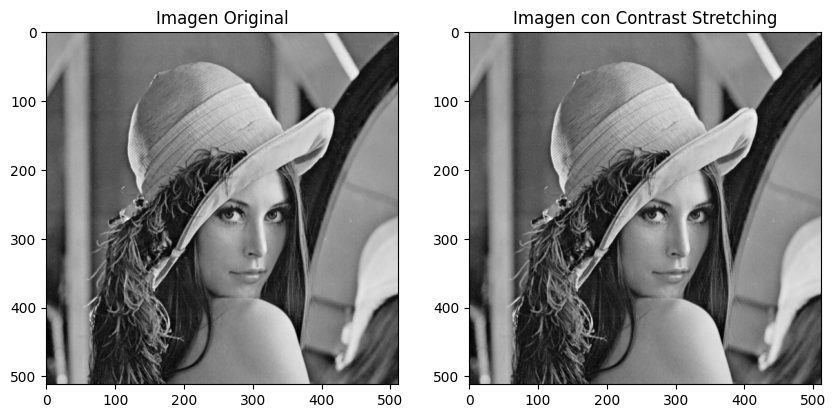

In [123]:
Imin = np.amin(gray_img)
Imax = np.amax(gray_img)
stretched_img = ((gray_img - Imin) * (255 / (Imax - Imin))).astype(np.uint8)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen Original")
plt.subplot(1, 2, 2)
plt.imshow(stretched_img, cmap='gray')
plt.title("Imagen con Contrast Stretching")
plt.show()

## 🔬 **7. Aplicaciones y Experimentación** <a name="tema7"></a>

### 🏆 **Desafío:** Prueba diferentes transformaciones

📌 **Instrucciones:**
- Aplica **otras transformaciones geométricas** combinando traslación, rotación y escalado.
- Experimenta con **diferentes valores de umbralización** para mejorar la segmentación.
- Prueba distintos **valores de gamma** en la corrección gamma.
- Realiza **combinaciones de ecualización de histograma** con otras técnicas de mejora.

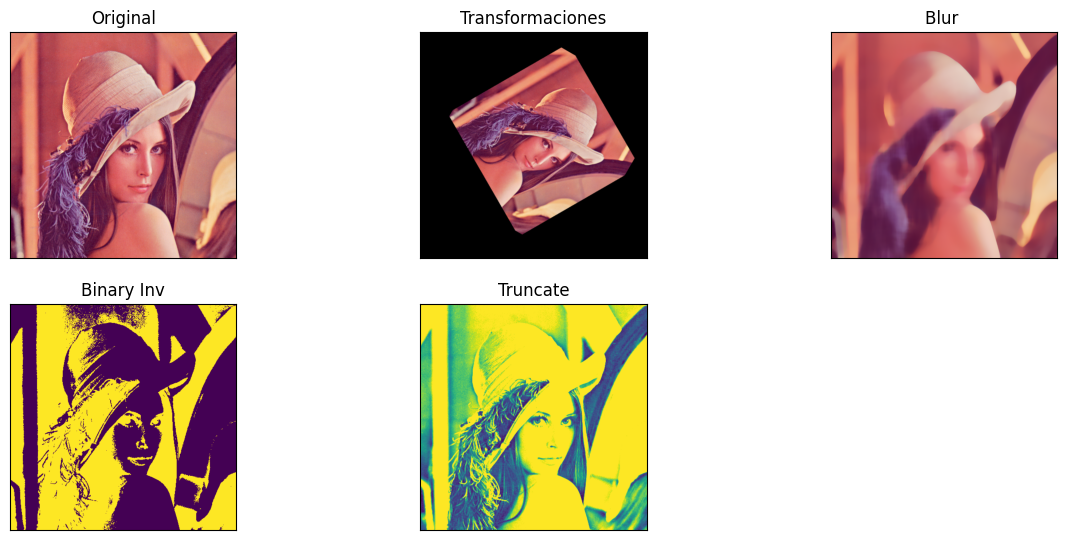

In [135]:
# 🏆 Escribe aquí tu código para experimentar con diferentes transformaciones

tx, ty = 10, -20  # Desplazamiento en x e y
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_img = cv.warpAffine(image, translation_matrix, (w, h))

angle = -30
scale = 0.8
center = (w // 2, h // 2)
rotation_matrix = cv.getRotationMatrix2D(center, angle, scale)
rotated_img = cv.warpAffine(translated_img, rotation_matrix, (w, h))

gray_img  = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

#Combiar rotación
affine_matrix = np.dot(rotation_matrix, np.vstack([translation_matrix, [0, 0, 1]]))[:2]
transformed_img = cv.warpAffine(rotated_img, affine_matrix, (w, h))

#Blur
blur = cv.medianBlur(image, 25) # A mayor cantidad, borders menos finos

#Valores de umbralización
ret, thresh1 = cv.threshold(gray_img,127,255,cv.THRESH_BINARY_INV)
ret, thresh2 = cv.threshold(gray_img,127,255,cv.THRESH_TRUNC)

titles = ['Original', 'Transformaciones', 'Blur ','Binary Inv', 'Truncate']
images = [image, transformed_img, blur, thresh1, thresh2]

plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


## 🎭 **8. CDF y Ecualización con Histogramas** <a name="tema8"></a>
📌 **Objetivo:** Visualizar cómo cambia la distribución de la intensidad antes y después de la ecualización del histograma.

In [ ]:
%%capture
image_url = "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/refs/heads/2024/Sesiones/Sesion2/Imagenes/Einstein_1_lowcontrast.tif"
file_path = "Einstein_1_lowcontrast.tif"
!wget -O {file_path} {image_url}

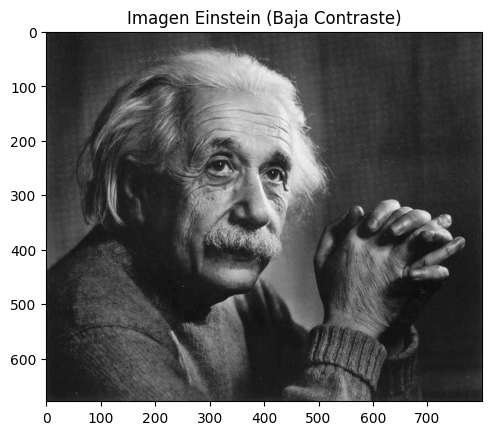

In [ ]:
# 📥 **Carga de Imagen Einstein**
image_path = "Einstein_1_lowcontrast.tif"
image_einstein = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Mostrar la imagen cargada
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Einstein (Baja Contraste)")
plt.show()

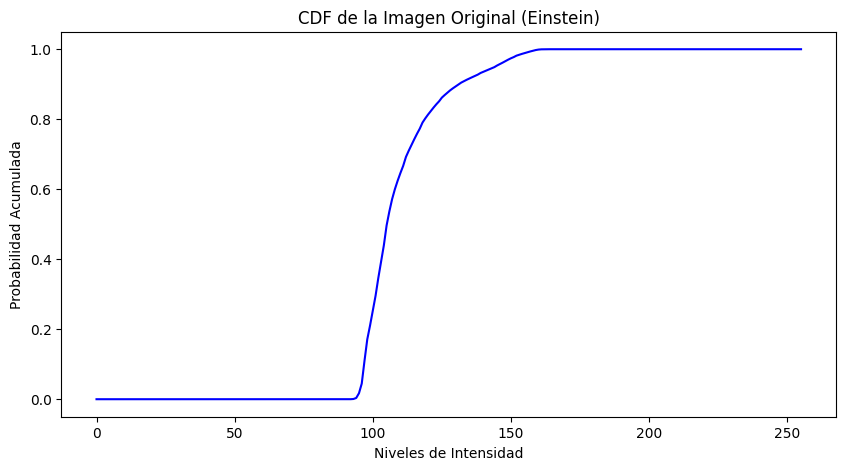

In [ ]:
# Calcular el histograma y la función de distribución acumulativa (CDF)
hist, bins = np.histogram(image_einstein.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_norm_orig = cdf / cdf.max()

plt.figure(figsize=(10,5))
plt.plot(cdf_norm_orig, color='b')
plt.xlabel('Niveles de Intensidad')
plt.ylabel('Probabilidad Acumulada')
plt.title('CDF de la Imagen Original (Einstein)')
plt.show()

### 📌 **Ecualización de Histograma con Visualización**

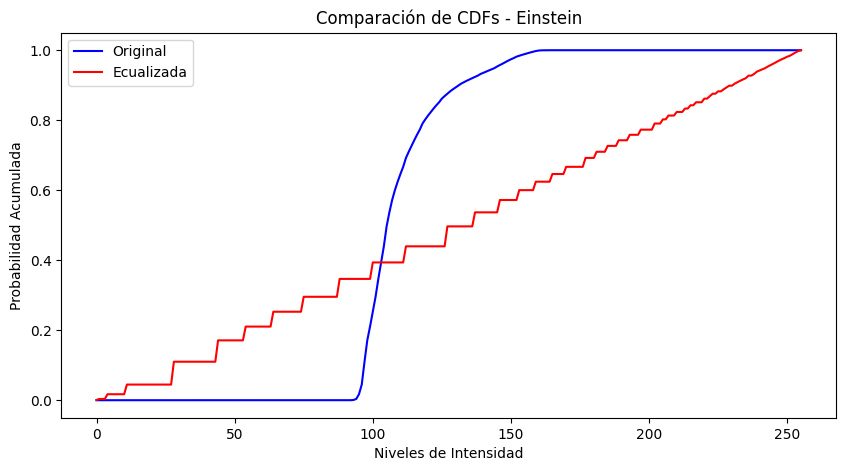

In [ ]:
# Aplicar ecualización de histograma
equ = cv.equalizeHist(image_einstein)
hist_equ, bins_equ = np.histogram(equ.flatten(), 256, [0,256])
cdf_equ = hist_equ.cumsum()
cdf_norm_equ = cdf_equ / cdf_equ.max()

plt.figure(figsize=(10,5))
plt.plot(cdf_norm_orig, color='b', label='Original')
plt.plot(cdf_norm_equ, color='r', label='Ecualizada')
plt.xlabel('Niveles de Intensidad')
plt.ylabel('Probabilidad Acumulada')
plt.title('Comparación de CDFs - Einstein')
plt.legend()
plt.show()

### 📌 **Comparación Visual Antes y Después de la Ecualización**

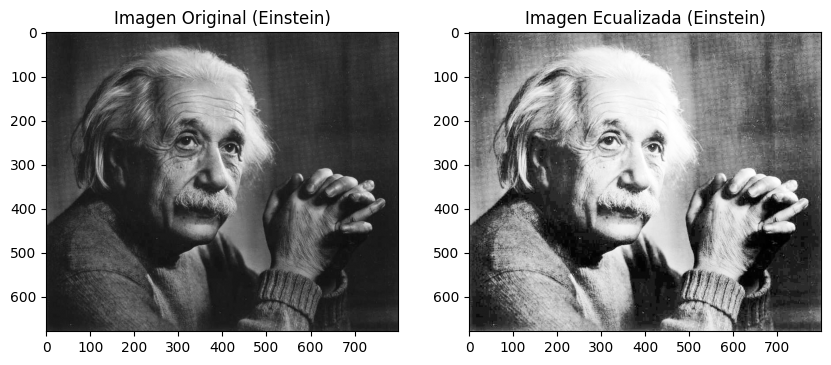

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Original (Einstein)")
plt.subplot(1, 2, 2)
plt.imshow(equ, cmap='gray')
plt.title("Imagen Ecualizada (Einstein)")
plt.show()

/tmp/ipykernel_8041/4006270975.py:4: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
/tmp/ipykernel_8041/4006270975.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ.ravel(), 256, [0,256], color='r')


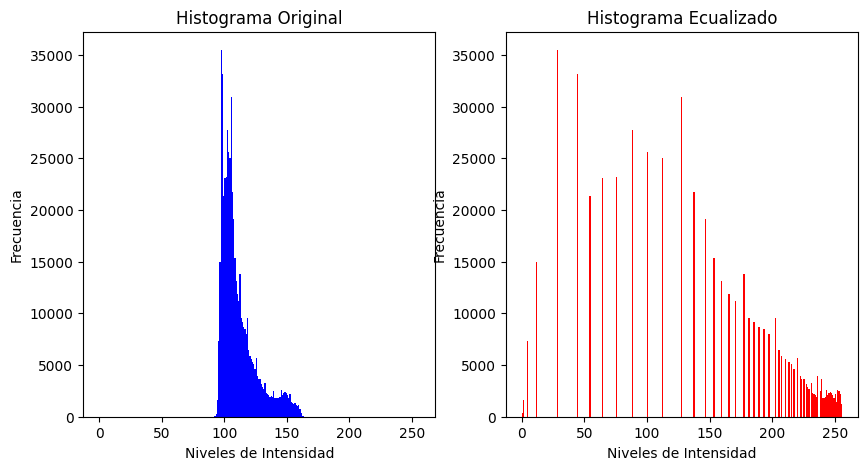

In [ ]:
# Plotear los histogramas
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
plt.title("Histograma Original")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.subplot(1, 2, 2)
plt.hist(equ.ravel(), 256, [0,256], color='r')
plt.title("Histograma Ecualizado")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.show()

### ⚡ **9. CLAHE (Contrast Limited Adaptive Histogram Equalization)** <a name="tema5"></a>

📌 **Objetivo:** Aplicar ecualización adaptativa para mejorar el contraste sin amplificar demasiado el ruido.

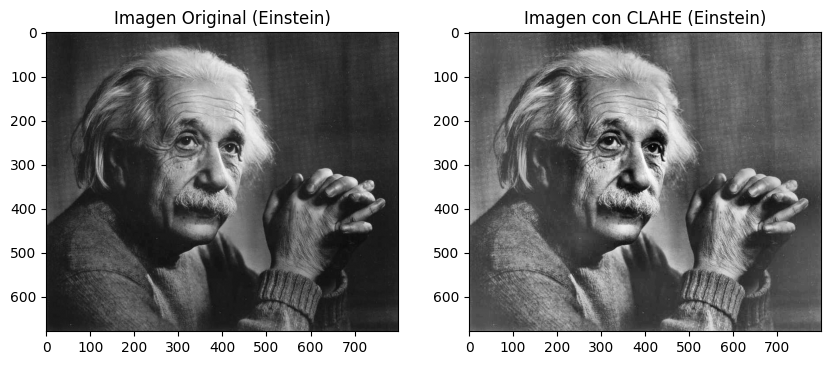

In [ ]:
clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
clahe_img = clahe.apply(image_einstein)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Original (Einstein)")
plt.subplot(1, 2, 2)
plt.imshow(clahe_img, cmap='gray')
plt.title("Imagen con CLAHE (Einstein)")
plt.show()

### 🔍 **10. Ampliación del Histograma (Contrast Stretching)** <a name="tema6"></a>
📌 **Objetivo:** Expandir el rango dinámico de la imagen para mejorar el contraste.

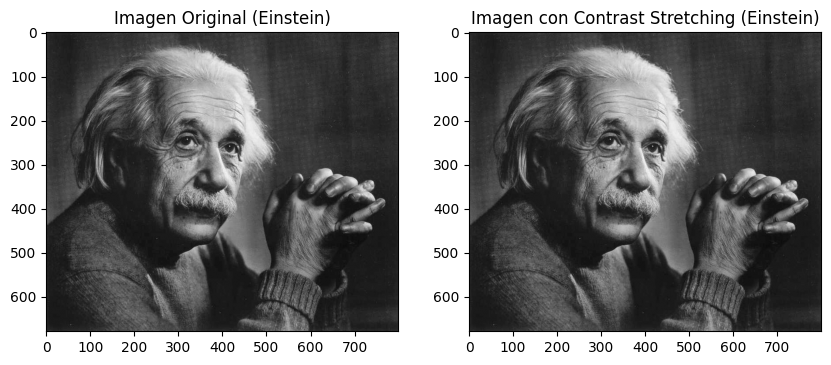

In [ ]:
Imin = np.amin(image_einstein)
Imax = np.amax(image_einstein)
stretched_img = ((image_einstein - Imin) * (255 / (Imax - Imin))).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Original (Einstein)")
plt.subplot(1, 2, 2)
plt.imshow(stretched_img, cmap='gray')
plt.title("Imagen con Contrast Stretching (Einstein)")
plt.show()

/tmp/ipykernel_8041/2875516595.py:13: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
/tmp/ipykernel_8041/2875516595.py:18: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ.ravel(), 256, [0,256], color='r')
/tmp/ipykernel_8041/2875516595.py:23: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(clahe_img.ravel(), 256, [0,256], color='g')


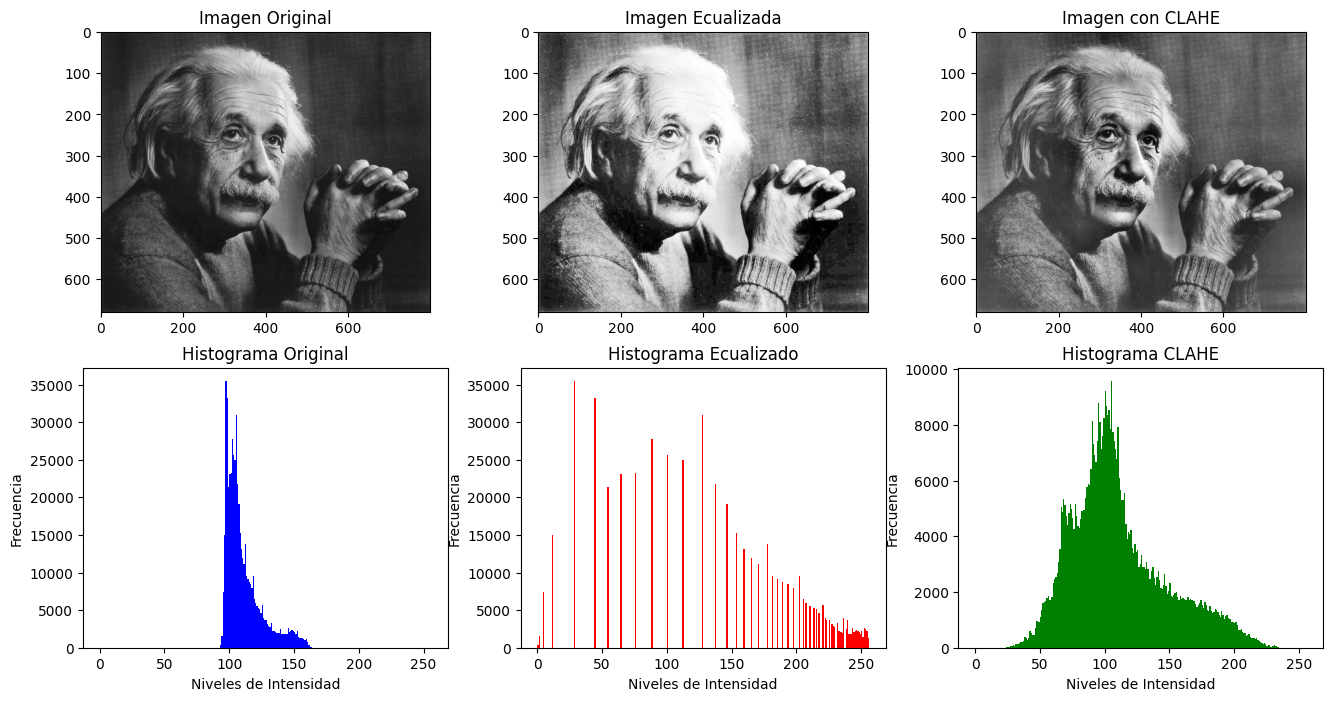

In [ ]:
# @title resultados
plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1)
plt.imshow(image_einstein, cmap='gray')
plt.title("Imagen Original")
plt.subplot(2, 3, 2)
plt.imshow(equ, cmap='gray')
plt.title("Imagen Ecualizada")
plt.subplot(2, 3, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title("Imagen con CLAHE")
plt.subplot(2, 3, 4)
plt.hist(image_einstein.ravel(), 256, [0,256], color='b')
plt.title("Histograma Original")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.subplot(2, 3, 5)
plt.hist(equ.ravel(), 256, [0,256], color='r')
plt.title("Histograma Ecualizado")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.subplot(2, 3, 6)
plt.hist(clahe_img.ravel(), 256, [0,256], color='g')
plt.title("Histograma CLAHE")
plt.xlabel("Niveles de Intensidad")
plt.ylabel("Frecuencia")
plt.show()

### 🔬 **11. Preguntas y Reflexión** <a name="tema7"></a>

**Preguntas:**
- ¿Cuál es la diferencia entre "estiramiento de contraste" y "ecualización de histograma"?
- ¿Cuándo preferirías usar CLAHE sobre la ecualización estándar?
- ¿Qué ventajas y desventajas tiene el contraste adaptativo?

* El **estiramiento de contraste** distribuye valores de intensidad de los píxeles, es decir los ajusta para que los oscuros sean más oscuros y viceversa con los más claros.
* La **ecualización de histograma**, permite interpretar los efectos de la transformaciones, también permite desarrollar transformaciones para corregir el
histograma. Cambia de manera global la intensidad.
* Ya que aplica ecualización en pequeñas regiones, la preferiría cuando la imagen tenga mucha iluminación desproporcionada.
* La principal desventaja es el costo computacional, ya que se aplica en varias regiones de la imagen, también puede amplificar el ruido cuando no se tiene una calidad adecuada, en su contra parte, las ventajas serián, evita la sobreexposición en cierta regiones de la imagen, mejora el contraste de la imagen sin afectar su totalidad.